In [47]:
import os
import graphviz
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

#### 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법.
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측.
* **if-then-else** 결정 규칙을 통해 데이터 학습.
* 트리의 깊이가 깊을 수록 복잡한 모델.

* 결정 트리(Decision Tree) 장점
  * 이해와 해석이 쉽다.
  * 시각화가 용이하다.
  * 많은 데이터 전처리가 필요하지 않다.
  * 수치형과 범주형 데이터 모두를 다룰 수 있다.

#### 지니계수(Gini index)를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미.
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할.

####  Parameter of Decision Tree Classifier<br>

#### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
- 과적합을 제어하는데 사용 
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>

#### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>

#### max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>

#### max_depth	: 트리의 최대 깊이
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>

#### max_leaf_nodes:	리프노드의 최대 개수

In [12]:
iris         = load_iris()
df           = pd.DataFrame( iris.data )
df.columns   = iris.feature_names
df['specis'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
model_Tree = DecisionTreeClassifier( criterion='entropy' )
x_train, x_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.2, 
                                                    random_state=11,  stratify=iris.target )
model_Tree.fit( x_train, y_train )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
print(f'Accuracy of train data : { round(model_Tree.score( x_train, y_train ), 3)*100 }%' )
print(f'Accuracy of test data  : { round(model_Tree.score( x_test, y_test ),   3)*100 }%' )

Accuracy of train data : 100.0%
Accuracy of test data  : 100.0%


In [43]:
model_Tree.feature_importances_     

array([0.0144845 , 0.0144845 , 0.65367701, 0.31735398])

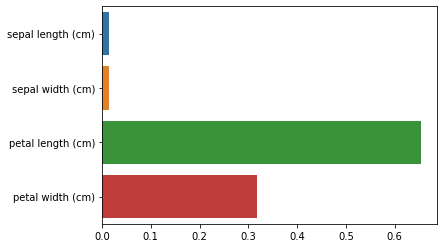

In [48]:
sns.barplot( x=model_Tree.feature_importances_, y=iris.feature_names )
plt.show()

In [16]:
export_graphviz( model_Tree, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names )

- Download : https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/ 

- os.environ['PATH'] += os.pathsep + Graphviz\bin의 경로(path)' 

In [26]:
os.environ['PATH'] += os.pathsep + r'C:\Program Files (x86)\Graphviz\bin' 

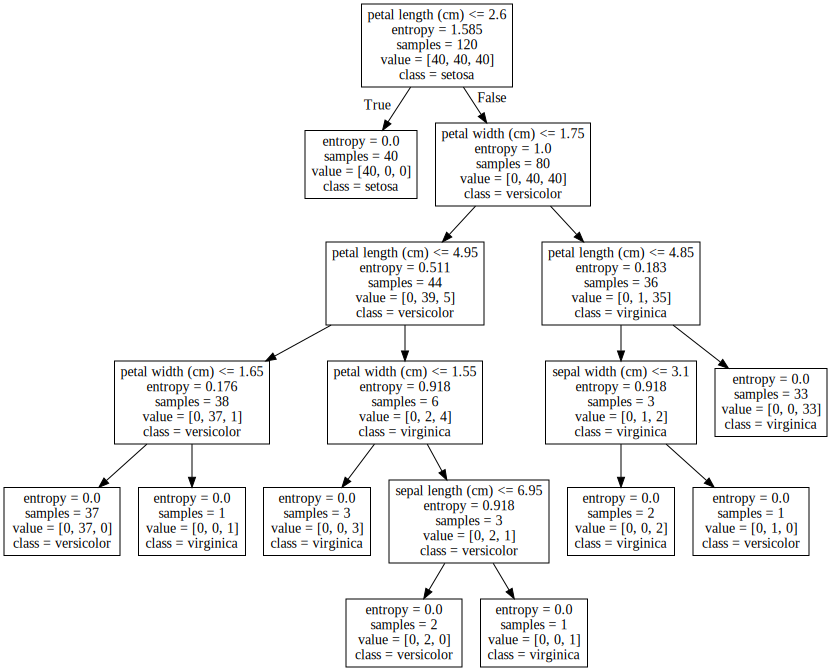

In [37]:
with open( 'tree.dot' ) as f:
    dot_graph = f.read()
graphviz.Source( dot_graph )

In [58]:
# 과소 or 과대 적합 check
pipe_tree   = make_pipeline( DecisionTreeClassifier( criterion='entropy' ) )
param_range = list( range(2, 11, 1) )
train_score, test_score = validation_curve( estimator=pipe_tree,  X=x_train, y=y_train,  
                                             param_name='decisiontreeclassifier__max_depth', 
                                             param_range=param_range, scoring='f1_macro', cv=5, verbose=1 )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [61]:
train_score.mean( axis=1 )

array([0.95403079, 0.96452569, 0.98122707, 0.98957468, 0.99583232,
       0.99791616, 1.        , 1.        , 1.        ])

In [64]:
test_score.mean( axis=1 )

array([0.91532779, 0.91532779, 0.92457205, 0.91614068, 0.92457205,
       0.91614068, 0.91633676, 0.91614068, 0.90790538])

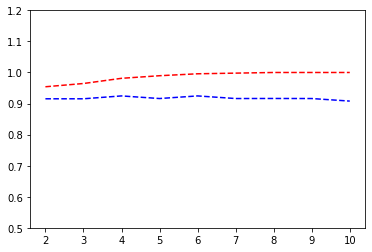

array([0.04, 0.05, 0.06, 0.07, 0.07, 0.08, 0.08, 0.08, 0.09])

In [78]:
plt.ylim( 0.5, 1.2 )
plt.plot( param_range, train_score.mean( axis=1 ), 'r--' )
plt.plot( param_range, test_score.mean( axis=1 ),  'b--' )
plt.show()
( train_score.mean( axis=1 ) - test_score.mean( axis=1 ) ).round(2)

- breast_cancer data를 이용하여 결정트리(DecisionTree)의 교차검증 곡선(validation_curve)을 그리시오.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


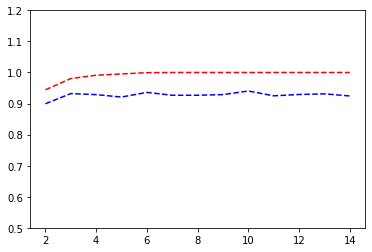

Difference : [0.04 0.05 0.06 0.07 0.06 0.07 0.07 0.07 0.06 0.08 0.07 0.07 0.08]
Accuracy of train data : 100.0%
Accuracy of test data  : 94.69999999999999%


In [99]:
breast_cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split( breast_cancer.data, breast_cancer.target, test_size=0.2, 
                                                    random_state=21,  stratify=breast_cancer.target )

pipe_tree   = make_pipeline( DecisionTreeClassifier( criterion='entropy' ) )
param_range = list( range(2, 15, 1) )
train_score, test_score = validation_curve( estimator=pipe_tree,  X=x_train, y=y_train,  
                                             param_name='decisiontreeclassifier__max_depth', 
                                             param_range=param_range, scoring='f1_macro', cv=5, verbose=1 )

plt.ylim( 0.5, 1.2 )
plt.plot( param_range, train_score.mean( axis=1 ), 'r--' )
plt.plot( param_range, test_score.mean( axis=1 ),  'b--' )
plt.show()
print('Difference :', ( train_score.mean( axis=1 ) - test_score.mean( axis=1 ) ).round(2) )

pipe_tree.fit( x_train, y_train )
print(f'Accuracy of train data : { round(pipe_tree.score( x_train, y_train ), 3)*100 }%' )
print(f'Accuracy of test data  : { round(pipe_tree.score( x_test, y_test ),   3)*100 }%' )